# Question refinement example for Titanic dataset


**Data Dictionary**

| Variable | Definition | Key |
|:----:| :--- |:--- |
| survival | Survival | 0 = No, 1 = Yes|
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
|Age  | Age in years |  |
|sibsp  | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare |Passenger fare  |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |
| | | |


**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")

### ทำการอ่านข้อมูลจาก FILE csv
DATASET สามารถ download ได้ที่

https://drive.google.com/file/d/1AGHVog0Zr3Dw_ckInFo7v8f_ufslv7cH/view?usp=sharing


In [2]:
# โยนไฟล์เข้ามาที่ colab
path_to_file = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(path_to_file, low_memory=False)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ดูข้อมูลเบื่องต้น

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## WHO?






  

### 1.มีผู้โดยสารผู้หญิงหรือผู้ชายเยอะกว่ากัน?

*   ผู้หญิงกี่คน  = 314
*   ผู้ชายกี่คน = 577



In [126]:
#CODE

#masking with condition
#data[masking]

# print(titanic_data[titanic_data["Sex"].isin(["female"])]["Sex"].count())

# print(titanic_data[titanic_data["Sex"].isin(["male"])]["Sex"].count())

print(titanic_data["Sex"].value_counts())


Sex
male      577
female    314
Name: count, dtype: int64


 ### 2.ผู้โดยสารชายที่รอดชีวิตมีกี่คน

*   รอด  = 342
*   ไม่รอด = 549


In [127]:
#CODE

#masking with condition
#data[masking]

print(titanic_data["Survived"].value_counts())


Survived
0    549
1    342
Name: count, dtype: int64


### 3.จำนวนผู้โดยสารชาย ชั้น upper economic ที่รอดชีวิต และเสียชีวิตมีกี่คน

*   รอด  = 45
*   ไม่รอด = 77

In [6]:
titanic_data[(titanic_data["Sex"] == "male") & 
             (titanic_data["Pclass"] == 1)]["Survived"].value_counts()

Survived
0    77
1    45
Name: count, dtype: int64

# Workshop1

## ตั้งคำถามเพิ่มเติมเกี่ยวกับข้อมูล Tinanic อีก 3 คำถาม

<Axes: >

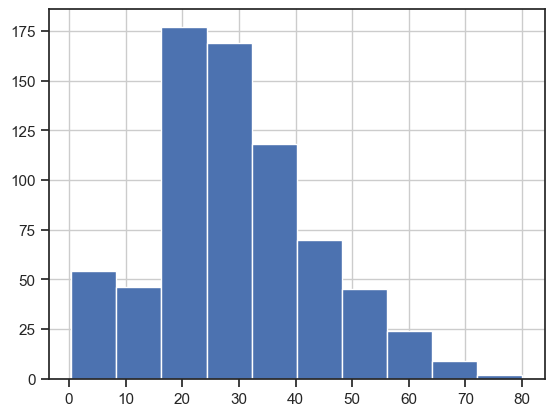

In [7]:
#คำถามที่1: วัยของผู้โดยสารส่วยใหญ่คือช่วงไหน
titanic_data["Age"].hist()


#ช่วงวัยรุ่น

In [130]:
#คำถามที่2: จำนวนผู้รอดชีวิตเป็นชายหรือหญิงมากกว่ากัน
titanic_data[["Sex","Survived"]].value_counts().reset_index().sort_values(["Survived", "Sex"])


# หญิงรอดจำนวนมากกว่า 124 คน

,Sex,Survived,count
3,female,0,81
0,male,0,468
1,female,1,233
2,male,1,109


<Axes: >

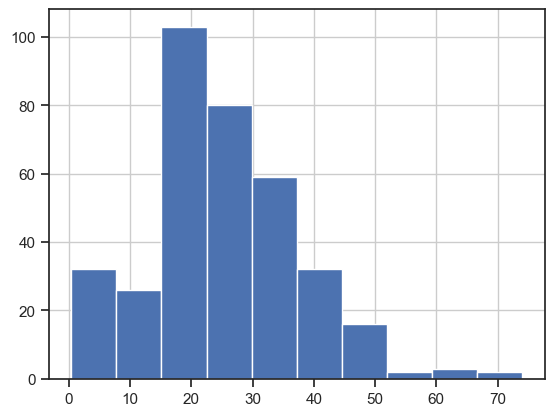

In [40]:
#คำถามที่3 : อายุผู้โดยสารในชั้น lower ส่วยมากอายุเท่าไหร่
titanic_data[titanic_data["Pclass"] == 3]["Age"].hist()


#ประมาณ 20-30 ปี

# Workshop2

### จากข้อมูล 2 ชุดที่กำหนดให้ ให้นศ. ฝึกตั้งคำถาม Question refinement มาข้อมูลละ 3 คำถาม พร้อมทั้งหาคำตอบของคำถามนั้นด้วย


## ข้อมูลชุดที่ 1: Higher Education Students Performance Evaluation

link: https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation


In [49]:
#โหลดข้อมูล
student = pd.read_csv("student.csv")
colums = ['STUDENT ID',
'Age',
'Sex',
'Graduated high-school type',
'Scholarship type',
'Additional work',
'Regular artistic or sports activity',
'Do you have a partner',
'Total salary',
'Transportation to the university',
'Accommodation type in Cyprus',
'Mother education',
'Father education',
'Number of sisters-brothers',
'Parental status',
'Mother occupation',
'Father occupation',
'Weekly study hours',
'Reading frequency',
'Reading frequency',
'Attendance to the seminars-conferences',
'Impact of your projects-activities',
'Attendance to classes',
'Preparation to midterm exams 1',
'Preparation to midterm exams 2',
'Taking notes',
'Listening in classes',
'Discussion improves my interest and success in the course',
'Flip-classroom',
'Cumulative grade point average in the last semester',
'Expected Cumulative grade point average in the graduation',
'Course ID',
'OUTPUT Grade']

student.columns = colums

student.head(10)

,STUDENT ID,Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester,Expected Cumulative grade point average in the graduation,Course ID,OUTPUT Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
5,STUDENT6,2,2,2,3,2,2,2,2,1,...,1,1,1,2,1,2,4,4,1,2
6,STUDENT7,1,2,2,4,2,2,2,1,1,...,1,1,3,3,3,3,4,4,1,5
7,STUDENT8,1,1,2,3,1,1,1,2,2,...,3,1,3,2,2,1,1,1,1,2
8,STUDENT9,2,1,3,3,2,1,1,1,1,...,1,1,3,2,2,2,4,3,1,5
9,STUDENT10,2,1,2,3,2,2,1,3,4,...,1,1,2,2,2,2,1,2,1,0


In [78]:

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   STUDENT ID                                                 145 non-null    object
 1   Age                                                        145 non-null    int64 
 2   Sex                                                        145 non-null    int64 
 3   Graduated high-school type                                 145 non-null    int64 
 4   Scholarship type                                           145 non-null    int64 
 5   Additional work                                            145 non-null    int64 
 6   Regular artistic or sports activity                        145 non-null    int64 
 7   Do you have a partner                                      145 non-null    int64 
 8   Total salary        

In [146]:
#คำถามที่ 1: นักเรียนที่ได้เกรด AA ส่วนใหญเป็นเพศไหน 
student[student["OUTPUT Grade"] == 7].value_counts("Sex")

Sex
2    17
Name: count, dtype: int64

In [1]:
#คำตอบของคำถามที่1:
#2 : male

In [152]:
#คำถามที่2: รายได้ส่วนมากขอกักศึกษาส่วนใหญ่เป็นเท่าไหร่
student["Total salary"].value_counts()


Total salary
1    93
2    27
3    16
5     5
4     4
Name: count, dtype: int64

In [14]:
#คำตอบของคำถามที่2:
# ระดับ 1 : USD 135-200

In [168]:
#คำถามที่3: นักศึกษาที่ผู้ปกครองเสียชีวิตคิดเป็นเท่าใดคิดเป็นร้อยละเท่าใด
proportion = student["Parental status"].value_counts().reset_index()
proportion["ratio"] = proportion["count"]/proportion["count"].sum()
proportion

,Parental status,count,ratio
0,1,127,0.875862
1,2,11,0.075862
2,3,7,0.048276


In [16]:
#คำตอบของคำถามที่3:
#ร้อยละ 4.83

## ข้อมูลชุดที่ 2: Clickstream Data for Online Shopping

link: https://archive.ics.uci.edu/dataset/553/clickstream+data+for+online+shopping

In [45]:
#โหลดข้อมูล
shopping = pd.read_csv("e-shop clothing 2008.csv", delimiter=";")
shopping.head(10)

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
5,2008,4,1,6,29,1,3,C56,6,1,2,57,1,4
6,2008,4,1,7,29,1,3,C57,5,1,2,33,2,4
7,2008,4,1,8,29,1,4,P67,9,5,1,38,1,4
8,2008,4,1,9,29,1,4,P82,6,4,2,48,1,5
9,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2


In [59]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [73]:
shopping["order"].describe()

count    165474.000000
mean          9.817476
std          13.478411
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         195.000000
Name: order, dtype: float64

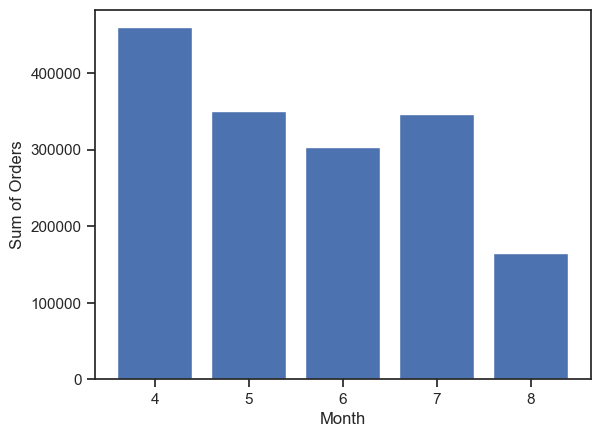

In [97]:
#คำถามที่1: ในเดือนไหนมียอด order สูงที่สุด
df_month = shopping.groupby('month')['order'].sum().reset_index()
plt.bar(df_month['month'], df_month['order'])
plt.xlabel('Month')
plt.ylabel('Sum of Orders')
plt.show()

In [19]:
#คำตอบของคำถามที่1: เดือนที่ 4 April

In [117]:
#คำถามที่2: 3 ประเทศที่ที่มีsessionมาที่สุด
df_country = shopping.groupby('country')['session ID'].count().reset_index()
df_country.sort_values("session ID", ascending=False).head(3)


,country,session ID
28,29,133963
8,9,18003
23,24,4091


In [21]:
#คำตอบของคำถามที่2:
# จาก 
# 1. 29 = Poland
# 2. 8  = Cyprus
# 3. 23 = Latvai

In [142]:
#คำถามที่3: 3 สีอันดับที่คนนิยมน้อยที่สุด

shopping["colour"].value_counts().reset_index().sort_values('count', ascending=True).head(3)

,colour,count
13,5,1667
12,8,2664
11,10,3579


In [23]:
#คำตอบของคำถามที่3:
# 5 = burgundy
# 8 = navy blue
# 10 = olive